#### Packages importing and file reading

In [16]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import re
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')

In [17]:
imbd = pd.read_csv('imbd.csv')
netflix_film = pd.read_csv('netflix_film.csv')
netflix = pd.read_csv('netflix.csv')
membership = pd.read_csv('membership.csv')

#### A glance of datasets

In [18]:
print(imbd.shape)
print(netflix.shape)
print(netflix_film.shape)
print(membership.shape)

(2743, 4)
(1402, 8)
(723, 6)
(30, 5)


In [19]:
imbd.sample(3)

,avg_rating,num_reviews,rating_count,title
250,8.2,11,"1,601",Bobby Robson: More Than a Manager
1472,9.4,5,"3,688",Ghosts
2362,4.7,26,"1,409",The Hard Way


In [20]:
netflix_film.sample(3)

,distribution,genre,language,length,premiere,title
601,original film,Thriller,"Worldwide except Hong Kong, India, Japan, Sing...","1 hour, 55 min.",NaN,Sara's Notebook
331,original film,Animation/Fantasy,2022\n,NaN,NaN,NaN
478,original film,Ava DuVernay/Buddy film,TBA\n,NaN,NaN,NaN


In [21]:
netflix.sample(3)

,episodes,genre,language,length,premiere,seasons,status,title
747,NaN,Discovery,English,43–52 min.,NaN,NaN,Pending\n,Frontier
411,7,Period drama,English,35–56 min.,"March 22, 2019",1,Renewed,Most Beautiful Thing
557,NaN,Comedy,English,23–53 min.,2018-05-30,4,Ended,Unbreakable Kimmy Schmidt


In [22]:
membership.sample(3)

,Unnamed: 0,year,quarter,paid_membership,quarter_revenue
21,21,2017,2,99.04,2785.0
28,28,2019,1,148.86,4521.0
10,10,2014,3,50.65,1409.0


### Tables merging 

In [31]:
#inner join netflix table with imbd table on title and drop status, episodes, seasons variables for now
inj = pd.merge(netflix, imbd, how='inner', on ='title').drop(['status','episodes','seasons'], axis=1)
inj.sample(3)

,genre,language,length,premiere,title,avg_rating,num_reviews,rating_count
279,NaN,English,15–26 min.,"November 20, 2018",Motown Magic,7.8,6,153
936,Drama,English\n,NaN,2016,Wanted,8.4,4,861
837,Animation,English\n,NaN,2015,Inspector Gadget,4.6,13,337


In [30]:
#inner join netflix_film with imbd on title
ifj = pd.merge(imbd, netflix_film, how='inner', on ='title').drop(['distribution'], axis=1)
ifj.sample(3)

,avg_rating,num_reviews,rating_count,title,genre,language,length,premiere
165,6.4,875,"149,372",Bright,Urban fantasy,TBA\n,NaN,NaN
139,6.6,2,"225,210",Bird Box,Psychological thriller,English\n,"2 hours, 4 min.","December 21, 2018"
298,6.7,68,"6,089",Knock Down the House,NaN,English\n,"1 hour, 27 min.","May 1, 2019"


In [29]:
#concatenate inj and ifj
infj = pd.concat([inj, ifj], axis = 0,sort=True)
infj.sample(3)

,avg_rating,genre,language,length,num_reviews,premiere,rating_count,title
332,6.9,Political drama,English,35–53 min.,23,"May 5, 2016","3,967",Marseille
668,7.5,CBBC,English,28–59 min.,32,NaN,"1,161",The Worst Witch
698,7.5,CBBC,English,28–59 min.,32,NaN,"1,161",The Worst Witch


In [36]:
#remove null value in premiere column
infj = infj.loc[~infj['premiere'].isnull(),:]
infj.sample(3)

,avg_rating,genre,language,length,num_reviews,premiere,rating_count,title
934,7.4,Comedy,English\n,NaN,53,2017-05-28,"7,106",White Gold
65,8.1,Comedy-drama,English,50–92 min.,331,2014-06-06,"257,345",Orange Is the New Black
507,8.5,Documentary,English,43–51 min.,20,"December 22, 2017","3,336",The Toys That Made Us


In [578]:
# strip "n/" in language column 
infj.language = infj.language.str.strip()
# infj.sample(3)

In [579]:
# drop NaN
infj = infj.dropna(axis=0, how='any')
# infj.sample(3)

In [580]:
# drop length column for inconsistent format
infj = infj.drop(['length'], axis=1)


In [33]:
infj.sample(3)

,avg_rating,genre,language,length,num_reviews,premiere,rating_count,title
128,6.8,Drama,English\n,"1 hour, 27 min.",8,"February 3, 2017","3,361",Imperial Dreams
325,5.9,Science fiction,English,41–45 min.,37,"March 29, 2019","1,681",Osmosis
211,5.2,Comedy,English\n,"1 hour, 34 min.",226,"May 25, 2018","12,986",Ibiza


In [582]:
# make premiere column as datetime to uniform format of premiere
infj['premiere'] = pd.to_datetime(infj['premiere'])

In [583]:
infj.head()

,avg_rating,genre,language,num_reviews,premiere,rating_count,title
0,7.8,Family drama,English,175,2016-11-25,"24,341",Gilmore Girls: A Year in the Life
1,6.9,Psychological thriller,English,136,2017-06-30,"11,950",Gypsy
2,8.5,Crime drama,English,299,2017-10-13,"124,268",Mindhunter
3,8.3,Western,English,229,2017-11-22,"39,539",Godless
4,8.2,Science fiction,English,540,2018-02-02,"104,909",Altered Carbon


In [584]:
infj['quarter'] = infj['premiere'].dt.quarter

In [585]:
infj['year'] = infj['premiere'].dt.year

In [586]:
infj.head()

,avg_rating,genre,language,num_reviews,premiere,rating_count,title,quarter,year
0,7.8,Family drama,English,175,2016-11-25,"24,341",Gilmore Girls: A Year in the Life,4,2016
1,6.9,Psychological thriller,English,136,2017-06-30,"11,950",Gypsy,2,2017
2,8.5,Crime drama,English,299,2017-10-13,"124,268",Mindhunter,4,2017
3,8.3,Western,English,229,2017-11-22,"39,539",Godless,4,2017
4,8.2,Science fiction,English,540,2018-02-02,"104,909",Altered Carbon,1,2018


In [587]:
# Set premiere as index
# pi = infjr.set_index('premiere')

In [588]:
# pi['quarter'] = pi.index.quarter

In [589]:
# pi['year'] = pi.index.year

In [590]:
membership.head()

,Unnamed: 0,year,quarter,paid_membership,quarter_revenue
0,0,2012,1,24.43,869.8
1,1,2012,2,25.71,889.2
2,2,2012,3,27.49,905.1
3,3,2012,4,30.36,945.2
4,4,2013,1,34.24,1024.0


In [591]:
membership = membership.drop('Unnamed: 0', axis=1)

In [592]:
membership.head()

,year,quarter,paid_membership,quarter_revenue
0,2012,1,24.43,869.8
1,2012,2,25.71,889.2
2,2012,3,27.49,905.1
3,2012,4,30.36,945.2
4,2013,1,34.24,1024.0


In [593]:
# merge membership with our infj
infj = pd.merge(infj, membership, how='inner', on =['year','quarter']).sort_values(['year','quarter'], ascending = False)#.reset_index().set_index('index')

In [594]:
infj['year_quarter'] = infj['year'].map(str) + '_0' + infj['quarter'].map(str)

In [595]:
infj.head()

,avg_rating,genre,language,num_reviews,premiere,rating_count,title,quarter,year,paid_membership,quarter_revenue,year_quarter
297,6.4,Zombie,English,1,2019-04-11,"14,100",Black Summer,2,2019,151.56,4923.0,2019_02
298,6.6,Teen,English,195,2019-04-26,"5,305",Chambers,2,2019,151.56,4923.0,2019_02
299,7.1,Mystery,English,358,2019-05-10,"10,810",The Society,2,2019,151.56,4923.0,2019_02
300,6.3,Social thriller,English,329,2019-05-24,"8,301",What/If,2,2019,151.56,4923.0,2019_02
301,9.1,Drama,English,421,2019-05-31,"33,956",When They See Us,2,2019,151.56,4923.0,2019_02


In [596]:
#drop unsless columns:
# infj = infj.drop(['paid_membership_y','quarter_revenue_y'], axis=1)

In [597]:
# categorical: genre, language, year_quater; 
# numerical: paid_membership, quarter_revenue, num_reviews, rating_count, avg_rating

In [598]:
# histogram: numeric 
# boxplot: categorical
# scatter: relationship between two columns(numerical)

In [599]:
# pd.to_numeric(infj['rating_count'])
# infj = infj.astype({"avg_rating": int, "num_reviews": int, "rating_count":int})
infj['rating_count'] = infj['rating_count'].str.replace(',','')
infj['rating_count']= pd.to_numeric(infj['rating_count'])

In [600]:
infj.head()

,avg_rating,genre,language,num_reviews,premiere,rating_count,title,quarter,year,paid_membership,quarter_revenue,year_quarter
297,6.4,Zombie,English,1,2019-04-11,14100,Black Summer,2,2019,151.56,4923.0,2019_02
298,6.6,Teen,English,195,2019-04-26,5305,Chambers,2,2019,151.56,4923.0,2019_02
299,7.1,Mystery,English,358,2019-05-10,10810,The Society,2,2019,151.56,4923.0,2019_02
300,6.3,Social thriller,English,329,2019-05-24,8301,What/If,2,2019,151.56,4923.0,2019_02
301,9.1,Drama,English,421,2019-05-31,33956,When They See Us,2,2019,151.56,4923.0,2019_02


In [603]:
print(type(infj['rating_count'][1]))
print(type(infj['avg_rating'][1]))
print(type(infj['num_reviews'][1]))
print(type(infj['paid_membership'][1]))
print(type(infj['quarter_revenue'][1]))

<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [604]:
a1 = pd.DataFrame(infj.groupby('year_quarter').count()['title']).reset_index()
# a1

In [605]:
a2 = pd.DataFrame(infj.groupby('year_quarter').mean()['avg_rating']).reset_index()
# a2

In [606]:
a3 = pd.DataFrame(infj.groupby('year_quarter').mean()['paid_membership']).reset_index()
# a3

In [730]:
a4 = pd.DataFrame(infj.groupby('year_quarter').median()['month']).reset_index()
a4

,year_quarter,month
0,2012_01,2.0
1,2012_02,6.0
2,2012_03,7.0
3,2013_01,2.0
4,2013_02,5.0
5,2013_03,7.0
6,2014_01,2.0
7,2014_02,6.0
8,2014_03,8.0
9,2014_04,12.0


In [607]:
inj123 = pd.merge(a1, a2, how='inner', on ='year_quarter')

In [608]:
inj1234 = pd.merge(inj123, a3, how='inner', on ='year_quarter')

In [713]:
inj1235 = pd.merge(inj1234, a4, how='inner', on ='year_quarter')

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [723]:
inj1234

,year_quarter,title,avg_rating,paid_membership
0,2012_01,3,8.000000,24.43
1,2012_02,1,8.300000,25.71
2,2012_03,1,8.100000,27.49
3,2013_01,2,8.850000,34.24
4,2013_02,3,7.866667,35.64
5,2013_03,1,8.100000,38.01
6,2014_01,3,8.333333,46.13
7,2014_02,3,8.166667,47.99
8,2014_03,12,8.333333,50.65
9,2014_04,3,8.100000,54.48


In [642]:
infj.sort_values('inception',ascending=False)

,avg_rating,genre,language,num_reviews,premiere,rating_count,title,quarter,year,paid_membership,quarter_revenue,year_quarter
297,6.4,Zombie,English,1,2019-04-11,14100,Black Summer,2,2019,151.56,4923.0,2019_02
298,6.6,Teen,English,195,2019-04-26,5305,Chambers,2,2019,151.56,4923.0,2019_02
299,7.1,Mystery,English,358,2019-05-10,10810,The Society,2,2019,151.56,4923.0,2019_02
300,6.3,Social thriller,English,329,2019-05-24,8301,What/If,2,2019,151.56,4923.0,2019_02
301,9.1,Drama,English,421,2019-05-31,33956,When They See Us,2,2019,151.56,4923.0,2019_02


In [695]:
infj['month'] = pd.DatetimeIndex(infj['premiere']).month #infj['month'] = 

,avg_rating,genre,language,num_reviews,premiere,rating_count,title,quarter,year,paid_membership,quarter_revenue,year_quarter,month
297,6.4,Zombie,English,1,2019-04-11,14100,Black Summer,2,2019,151.56,4923.0,2019_02,4
298,6.6,Teen,English,195,2019-04-26,5305,Chambers,2,2019,151.56,4923.0,2019_02,4
299,7.1,Mystery,English,358,2019-05-10,10810,The Society,2,2019,151.56,4923.0,2019_02,5
300,6.3,Social thriller,English,329,2019-05-24,8301,What/If,2,2019,151.56,4923.0,2019_02,5
301,9.1,Drama,English,421,2019-05-31,33956,When They See Us,2,2019,151.56,4923.0,2019_02,5


In [789]:
infj.sample(5)

,avg_rating,genre,language,num_reviews,premiere,rating_count,title,quarter,year,paid_membership,quarter_revenue,year_quarter,month
36,8.8,Political drama,English,708,2017-05-30,433959,House of Cards,2,2017,99.04,2785.0,2017_02,5
329,7.9,Docu-series,English,9,2019-05-31,626,Killer Ratings,2,2019,151.56,4923.0,2019_02,5
187,8.1,Dark fantasy,English,153,2018-10-26,24596,Castlevania,4,2018,139.26,4187.0,2018_04,10
181,8.2,Comedy,English,177,2018-11-16,12133,The Kominsky Method,4,2018,139.26,4187.0,2018_04,11
183,5.7,Superhero,English,40,2018-11-09,1145,Super Drags,4,2018,139.26,4187.0,2018_04,11


In [795]:
infj.shape

(565, 13)

Text(0.5, 1.0, 'Productive months')

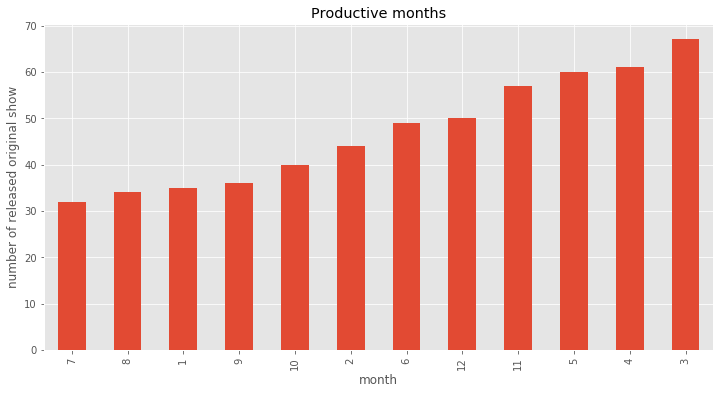

In [735]:
#Productive months
plt.figure(figsize=(12,6))
infj.groupby('month')['title'].count().sort_values(ascending=True).plot.bar()
plt.ylabel('number of released original show')
plt.title('Productive months')

Text(0.5, 1.0, 'Popular months')

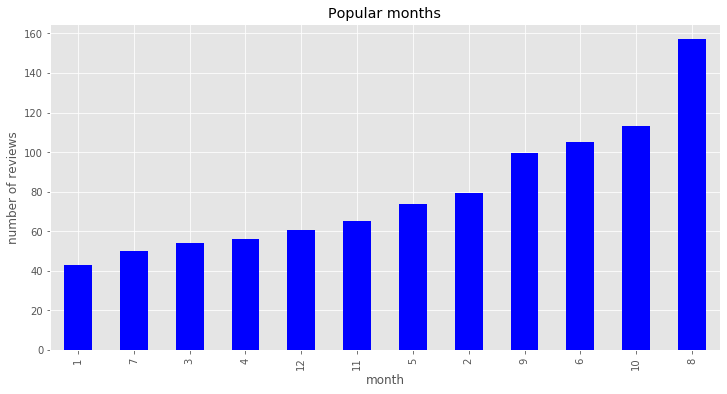

In [736]:
#find popular months
plt.figure(figsize=(12,6))
infj.groupby('month')['num_reviews'].median().sort_values(ascending=True).plot.bar(color='b')
plt.ylabel('number of reviews')
plt.title('Popular months')

In [765]:
gr = infj.iloc[:,[1,3]].sort_values('num_reviews', ascending = False)
# gr

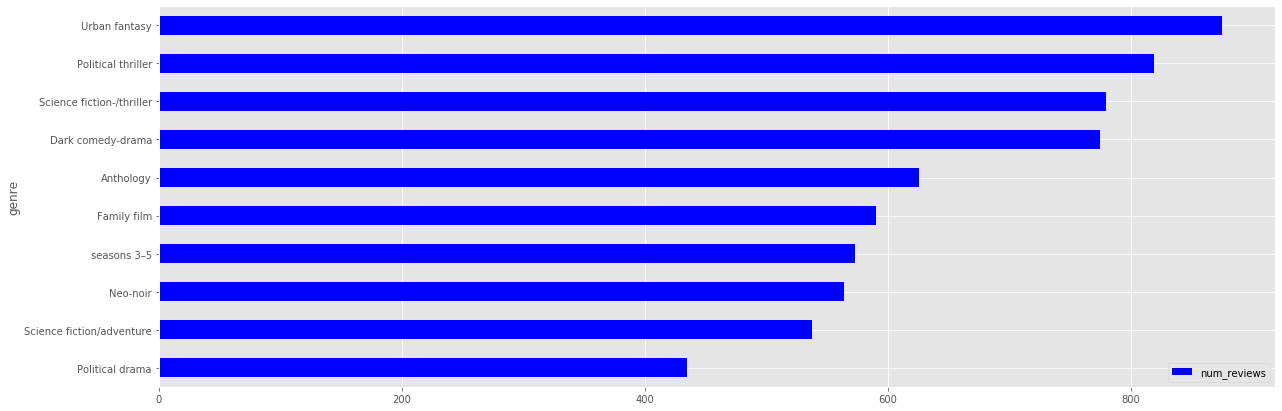

In [764]:
#what kind of genre has most reviews?
plt.rcParams["figure.figsize"] = (20,7)
gr.groupby('genre').mean().sort_values('num_reviews').tail(10).plot(kind='barh', color='b')

Text(0.5, 1.0, 'Correlation between paid_membership and quarter_revenue')

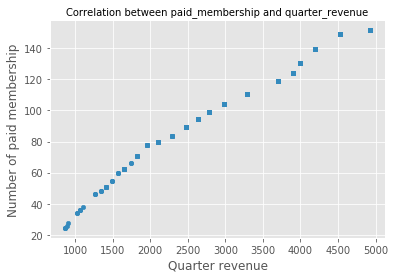

In [633]:
# 1test. 
nice1= infj.plot.scatter('quarter_revenue','paid_membership')
plt.xlabel("Quarter revenue")
plt.ylabel("Number of paid membership")
plt.title("Correlation between paid_membership and quarter_revenue",fontsize=10)

Text(0.5, 0, 'quarters')

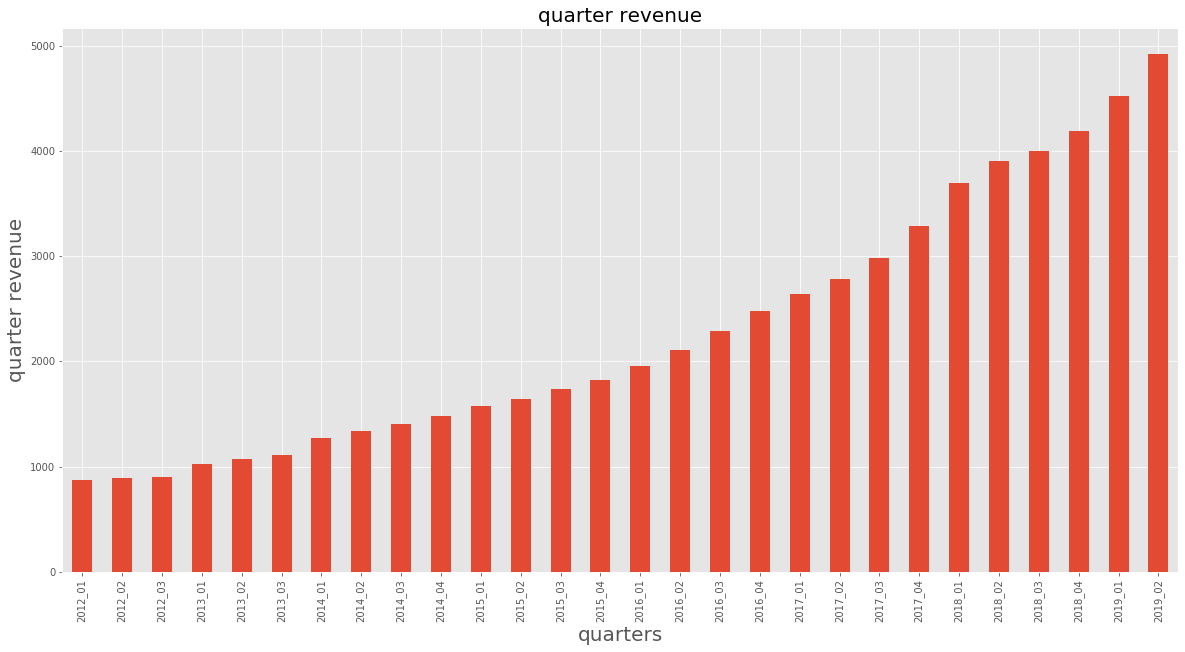

In [787]:
#0. quter and revenue:
infj.groupby('year_quarter')['quarter_revenue'].mean().sort_values(ascending=True).plot.bar(figsize=(20,10))
plt.ylabel('quarter revenue', fontsize= 20)
plt.title('quarter revenue',fontsize=20)
plt.xlabel('quarters',fontsize=20)

Text(0.5, 0, 'quarters')

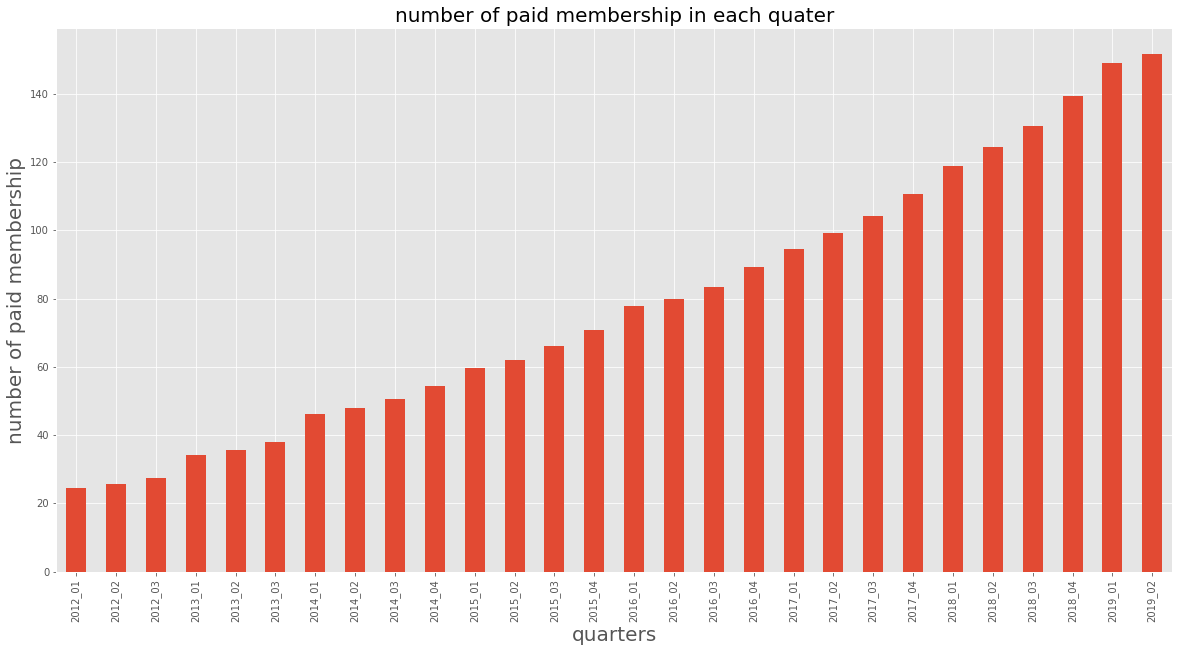

In [786]:
#0 year_quarter, number of paid membership
infj.groupby('year_quarter')['paid_membership'].mean().sort_values(ascending=True).plot.bar(figsize=(20,10))
plt.ylabel('number of paid membership',fontsize=20)
plt.title('number of paid membership in each quater',fontsize=20)
plt.xlabel('quarters',fontsize=20)

Text(0.5, 1, 'Correlation between paid_membership and quarter_revenue')

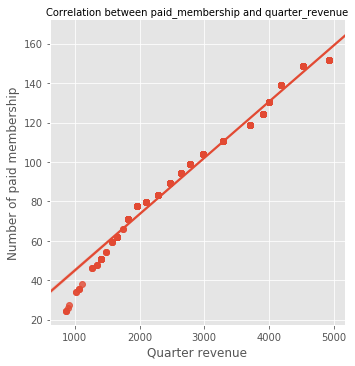

In [640]:
# 1.Correlation between paid_membership and quarter_revenue
nice = sns.lmplot("quarter_revenue", "paid_membership", infj, palette="Set2")
nice.set_axis_labels('Quarter revenue', 'Number of paid membership')
plt.title("Correlation between paid_membership and quarter_revenue",fontsize=10)

Text(0.5, 1, 'Correlation bet num_released_original_show&paid_membership in each quarter')

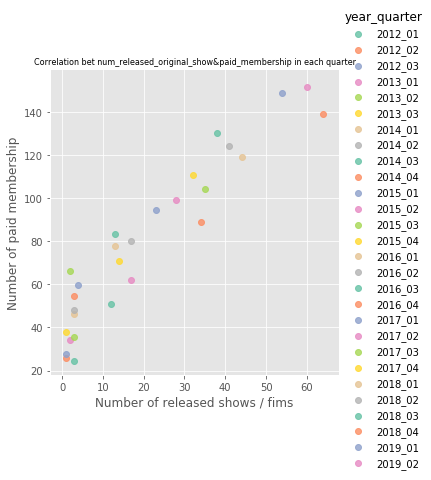

In [637]:
# 2.Correlation bet num_released_show&paid_membership in each quarter:
nice2=sns.lmplot("title", "paid_membership", inj1234, hue="year_quarter", palette="Set2", fit_reg=False)#col='paid_membership'
nice2.set_axis_labels('Number of released shows / fims', 'Number of paid membership')
plt.title("Correlation bet num_released_original_show&paid_membership in each quarter",fontsize=8)

In [612]:
# infj.groupby('year_quarter').mean()

In [613]:
# dir(infj.groupby('year_quarter'))

In [614]:
# infj['count'] = infj.groupby('year_quarter').count()['title'].values

In [616]:
# infj

In [650]:
infjtest = infj.sort_values(['year','quarter'], ascending = True) #ascending

Text(0.5, 1, '')

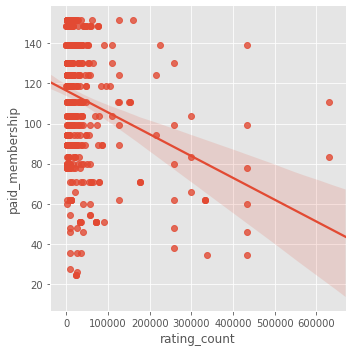

In [788]:
# No sense bet rating_count of original shows and paid membership 
nice3 = sns.lmplot("rating_count", "paid_membership", infjtest, palette="Set2")
# nice3.set_axis_labels('Quarter revenue', 'Number of paid membership')
plt.title("",fontsize=10)

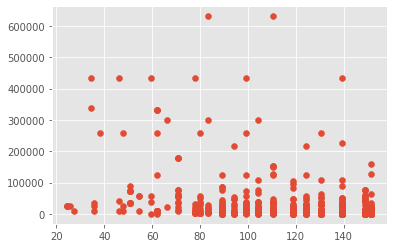

In [679]:
#plt.scatter(infj['paid_membership'],infj['rating_count']) #no sense!

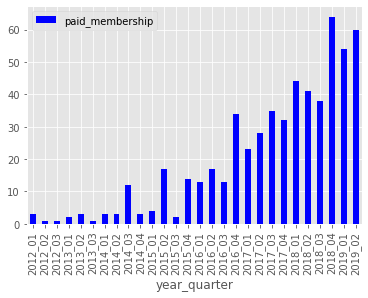

In [653]:
# infj[['year_quarter','paid_membership']].groupby('year_quarter').count().plot.bar(color='b')

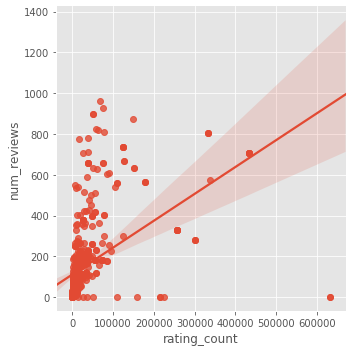

In [657]:
sns.lmplot('rating_count', 'num_reviews',infj)

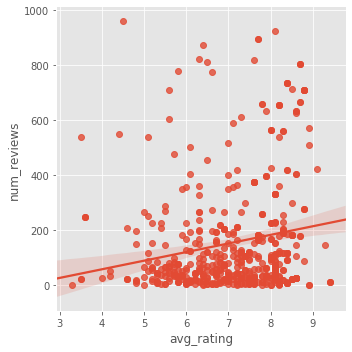

In [656]:
sns.lmplot('avg_rating', 'num_reviews',infj)

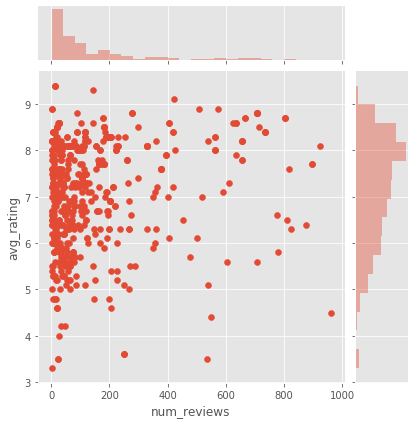

In [662]:
#
sns.jointplot(infj['num_reviews'], infj['avg_rating'])

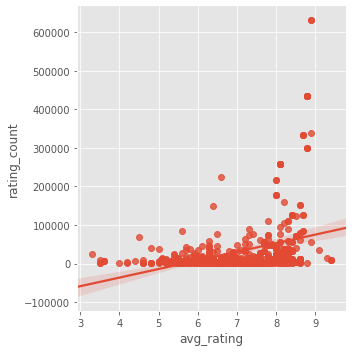

In [658]:
sns.lmplot('avg_rating', 'rating_count',infj)

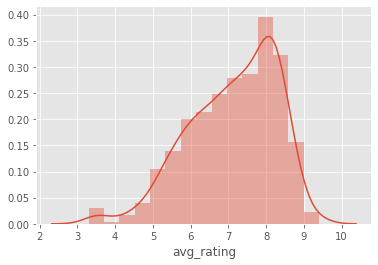

In [659]:
#distribution of average rating
sns.distplot(infj['avg_rating'])
plt.title("",fontsize=10)

In [ ]:
#rating_count\num_reviews\avg_rating - paid_membership_x

In [ ]:
# language frequency

In [ ]:
# rating_count\num_reviews\avg_rating - genre

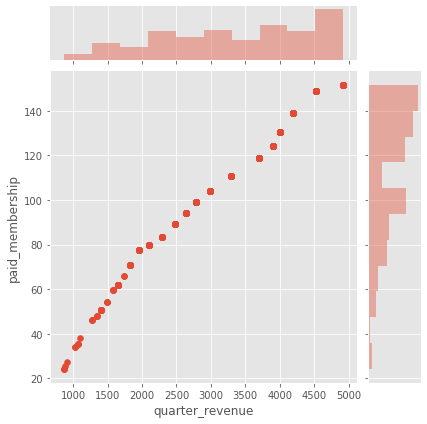

In [661]:
#same as the 1st.
sns.jointplot(infj["quarter_revenue"], infj['paid_membership'])

Text(0.5, 1.0, 'Histogram of language')

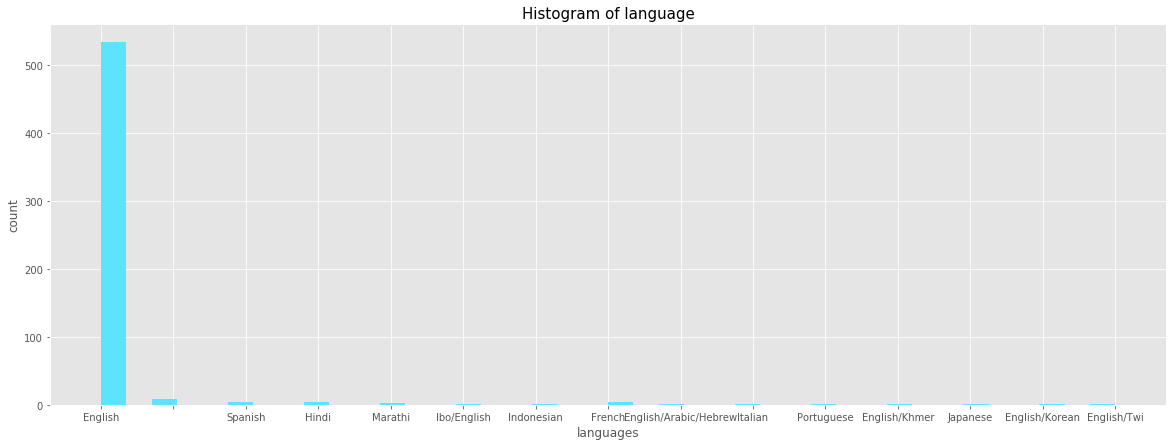

In [773]:
plt.rcParams["figure.figsize"] = (20,7)
plt.hist(infj['language'], bins=40, color="#5ee3ff")
plt.xlabel('languages') #log: normal distribution? Why do we use and when?
plt.ylabel('count')
plt.title('Histogram of language', fontsize=15)

In [677]:
infj.describe()

,avg_rating,num_reviews,rating_count,quarter,year,paid_membership,quarter_revenue
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,7.121770,154.769912,33034.224779,2.442478,2017.269027,112.825735,3379.126903
std,1.164412,200.372057,75695.313481,1.134079,1.481031,31.100952,1082.601753
min,3.300000,1.000000,53.000000,1.000000,2012.000000,24.430000,869.800000
25%,6.300000,25.000000,2124.000000,1.000000,2016.000000,89.090000,2478.000000
50%,7.300000,73.000000,7877.000000,2.000000,2018.000000,118.900000,3701.000000
75%,8.100000,192.000000,28878.000000,4.000000,2018.000000,139.260000,4187.000000
max,9.400000,961.000000,631000.000000,4.000000,2019.000000,151.560000,4923.000000


In [167]:
analysis1.mean().head()

,avg_rating,num_reviews,quarter,year,paid_membership,quarter_revenue
year_quarter,,,,,,
2012_01,8.04,75.300000,1.0,2012.0,24.43,869.8
2012_02,8.30,190.000000,2.0,2012.0,25.71,889.2
2012_03,7.90,48.666667,3.0,2012.0,27.49,905.1
2012_04,5.90,49.000000,4.0,2012.0,30.36,945.2
2013_01,8.25,374.000000,1.0,2013.0,34.24,1024.0


In [681]:
# membership.to_csv('membership')